## Lectura y gráfica de una Señal

### Importación de librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from scipy import signal

##### Abrir archivo txt

In [2]:
f = open("SenalECG/ECG_Reposo_Sujeto1.txt","r")
raw_data = f.readlines()[1] # con f.read() leemos todo el contenido
f.close()

raw_data

'# {"98:D3:71:FD:62:1E": {"position": 0, "device": "bitalino_rev", "device name": "98:D3:71:FD:62:1E", "device connection": "BTH98:D3:71:FD:62:1E", "sampling rate": 1000, "resolution": [4, 1, 1, 1, 1, 10], "firmware version": 1282, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2023-9-15", "time": "9:42:29.8", "channels": [2], "sensor": ["ECGBIT"], "label": ["A2"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A2"], "special": [{}], "digital IO": [0, 0, 1, 1]}}\n'

In [3]:
x = re.findall("[0-5][0-9]\d", raw_data)

print(x)

['100', '128', '202']


In [4]:
Fs = float(x[0])
Fs = Fs * 10
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=1000.0 hz
 Ts=0.001 s


## Leer archivo excluyendo 2 primeras filas

In [36]:
SenalReposo = np.genfromtxt("SenalECG/ECG_Reposo_Sujeto1.txt", delimiter="\t",skip_header = 3)
SenalEjercicio = np.genfromtxt("SenalECG/ECG_ActividadFisica_Sujeto1.txt", delimiter="\t", skip_header=3)

## Visualización de la señal

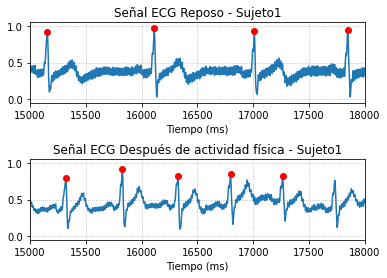

In [57]:
#Señal en reposo -Normalizacion
y1 = (SenalReposo[:, 5])
y2 = (SenalEjercicio[:, 5])
y1 = y1  - np.min(y1)
y1 = y1 / np.max(y1)
t1 = (np.arange(0,len(y1)) / Fs)
ind_peaks1, _ = signal.find_peaks(y1, height= 0.8)
ind_time1 = t1[ind_peaks1]

#Señal Después de actividad física - Normalizacion
y2 = y2 - np.min(y2)
y2 = y2 / np.max(y2)
t2 = (np.arange(0,len(y2)) / Fs)
ind_peaks2, _ = signal.find_peaks(y2, height= 0.77)
ind_time2 = t2[ind_peaks2]

#Graficos señales
plt.figure()
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.7)
plt.plot(y1, label="señal Reposo") 
plt.plot(ind_peaks1, y1[ind_peaks1], 'ro')
plt.title("Señal ECG Reposo - Sujeto1")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (ms)")
plt.xlim(15000,18000)

plt.subplot(2,1,2)
plt.plot(y2, label="señal Actividad Físida")  
plt.plot(ind_peaks2, y2[ind_peaks2], 'ro')
plt.title("Señal ECG Después de actividad física - Sujeto1")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (ms)")
plt.xlim(15000,18000)

fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('ECG_Sujeto1.png', transparent=False, )
plt.show()

[   66.29834254    61.03763988    60.06006006    63.29113924
    63.35797254    61.16207951    63.89776358    69.68641115
    60.48387097 15000.            60.36217304    59.46481665
    61.03763988    67.26457399    65.64551422    61.28702758
    62.56517205    66.96428571    71.77033493    63.15789474
    62.0475698     65.28835691 30000.            62.82722513
    60.91370558    68.72852234 15000.            66.00660066
    66.51884701 20000.            69.84866123    76.14213198
    68.49315068    66.37168142 30000.            70.58823529
    69.60556845    65.57377049    66.81514477    66.66666667
    63.89776358    67.41573034    70.33997655    65.28835691
    67.03910615    73.0816078     65.64551422    63.29113924
 30000.            69.84866123    67.72009029]
[   68.64988558   530.97345133 20000.          4000.
 12000.         12000.         12000.          6000.
 20000.         20000.          6666.66666667  6000.
   255.31914894 12000.          6000.            44.44444444
 

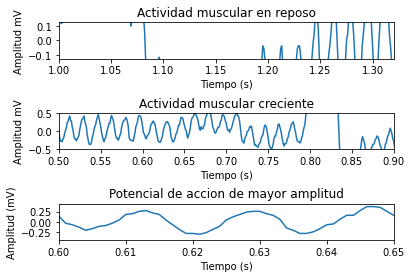

In [8]:
plt.subplot(3, 1, 1)
plt.plot(t, y)
plt.title("Actividad muscular en reposo")
plt.xlim(1, 1.32)
plt.ylim(-0.125, 0.125)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud mV")
plt.subplots_adjust(hspace=1.5)
#2
plt.subplot(3, 1, 2)
plt.plot(t, y)
plt.title("Actividad muscular creciente")
plt.xlim(0.5, 0.9)
plt.ylim(-0.5, 0.5)


plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud mV")
#3
plt.subplot(3, 1, 3)
plt.plot(t, y)
plt.title("Potencial de accion de mayor amplitud")
plt.xlim(0.6, 0.65)
plt.ylim(-0.45, 0.45)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
fig = plt.gcf()
fig.set_facecolor('white')
plt.savefig('DiferenciasActividadMuscular.png', transparent=False, )


No handles with labels found to put in legend.


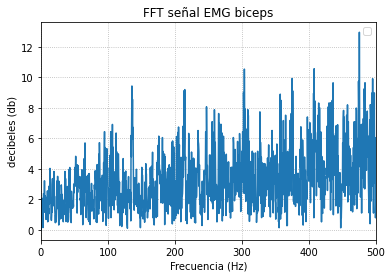

In [70]:
X = np.fft.fft(y)
X = np.abs(X)
N = len(y)
f = (Fs)*(np.arange(1,N+1)/N)
plt.figure()
plt.title("FFT señal EMG biceps")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)") 
plt.ylabel("decibeles (db)")
plt.legend(loc="upper right")
plt.plot(f,X)
plt.xlim((0, Fs/2))
fig = plt.gcf()
fig.set_facecolor('white')
plt.savefig('FFT_Senal.png', transparent=False, )